# Importing required packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

# Reading Data

In [2]:
Wine_Quality = pd.read_csv("Wine_Quality.csv")
Wine_Quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Standarize input data (Preprocess)

In [3]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
Wine_Quality['quality'] = pd.cut(Wine_Quality['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()

# #Bad becomes 0 and good becomes 1 
Wine_Quality['quality'] = label_quality.fit_transform(Wine_Quality['quality'])
print(Wine_Quality['quality'].value_counts())

y = Wine_Quality['quality']
X = Wine_Quality.drop('quality', axis = 1)

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state = 42, stratify = y)

0    1382
1     217
Name: quality, dtype: int64


# Models

### First Model: Logistic Regression

Mean squared error: 0.12
Training Accuracy: 0.88
Testing Accuracy: 0.88
Actual labels:
 0    346
1     54
Name: quality, dtype: int64 

Predicted labels:
 0    375
1     25
dtype: int64 



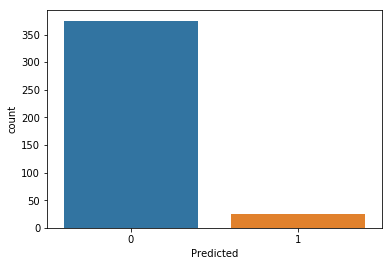

In [4]:
# Create linear regression object
regr = LogisticRegressionCV(cv=8, solver='liblinear', multi_class='auto')

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Accuracy
print("Training Accuracy: %.2f" % regr.score(X_train, y_train))
print("Testing Accuracy: %.2f" % regr.score(X_test, y_test))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.countplot(x='Predicted', data=df)
print("================\nActual labels:\n", y_test.value_counts(), "\n================\n")
print("================\nPredicted labels:\n", y_pred.value_counts(), "\n================\n")

### Second Model: Support Vector Machine

Mean squared error: 0.12
Training Accuracy: 0.93
Testing Accuracy: 0.90
Actual labels:
 0    346
1     54
Name: quality, dtype: int64 

Predicted labels:
 0    364
1     36
dtype: int64 



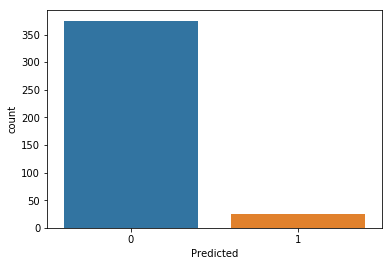

In [5]:
svc = SVC(gamma=0.2, kernel='poly')
svc.fit(X_train, y_train)

# Predict on test set
y_pred_svc = svc.predict(X_test)
y_pred_svc = pd.Series(y_pred_svc, index=y_test.index)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Accuracy
print("Training Accuracy: %.2f" % svc.score(X_train, y_train))
print("Testing Accuracy: %.2f" % svc.score(X_test, y_test))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.countplot(x='Predicted', data=df)
print("================\nActual labels:\n", y_test.value_counts(), "\n================\n")
print("================\nPredicted labels:\n", y_pred_svc.value_counts(), "\n================\n")